In [32]:
import seaborn as sns
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [33]:
path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/immobili.csv"
df=pd.read_csv(path, delimiter=',')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [34]:
df.rename(columns={"medv":"price"}, inplace=True)

In [35]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [36]:
df.head

<bound method NDFrame.head of         crim    zn  indus chas    nox     rm   age     dis  rad  tax ptratio  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2    4.09    1  296    15.3   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671    2  242    17.8   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671    2  242    17.8   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622    3  222    18.7   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622    3  222    18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...  ...     ...   
502  0.04527   0.0  11.93    0  0.573   6.12  76.7  2.2875    1  273    21.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675    1  273    21.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889    1  273    21.0   
505  0.04741   0.0  11.93    0  0.573   6.03  80.8   2.505    1  273    21.0   
506       is   not      a   ro     ck     et    sc      ie  nce    i      sn   

         

In [37]:
df = df.drop(labels=506, axis=0)

In [38]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
unique,504,26,76,2,81,446,356,412,9,66,46,357,455,229
top,0.01501,0.0,18.1,0,0.538,5.713,100.0,3.4952,24,666,20.2,396.9,7.79,50.0
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


In [39]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     506 non-null    object
 1   zn       506 non-null    object
 2   indus    506 non-null    object
 3   chas     506 non-null    object
 4   nox      506 non-null    object
 5   rm       506 non-null    object
 6   age      506 non-null    object
 7   dis      506 non-null    object
 8   rad      506 non-null    object
 9   tax      506 non-null    object
 10  ptratio  506 non-null    object
 11  b        506 non-null    object
 12  lstat    506 non-null    object
 13  price    506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [41]:
df = df.astype(float)

In [42]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

EDA

In [43]:
sns.set(color_codes=True)
%matplotlib inline

<Axes: >

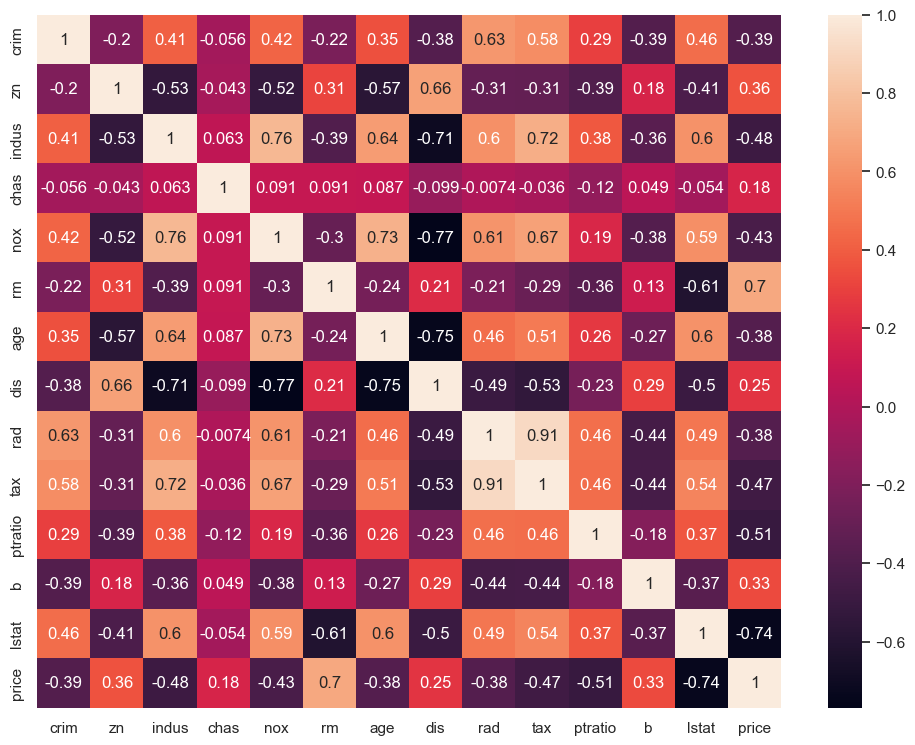

In [44]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True)

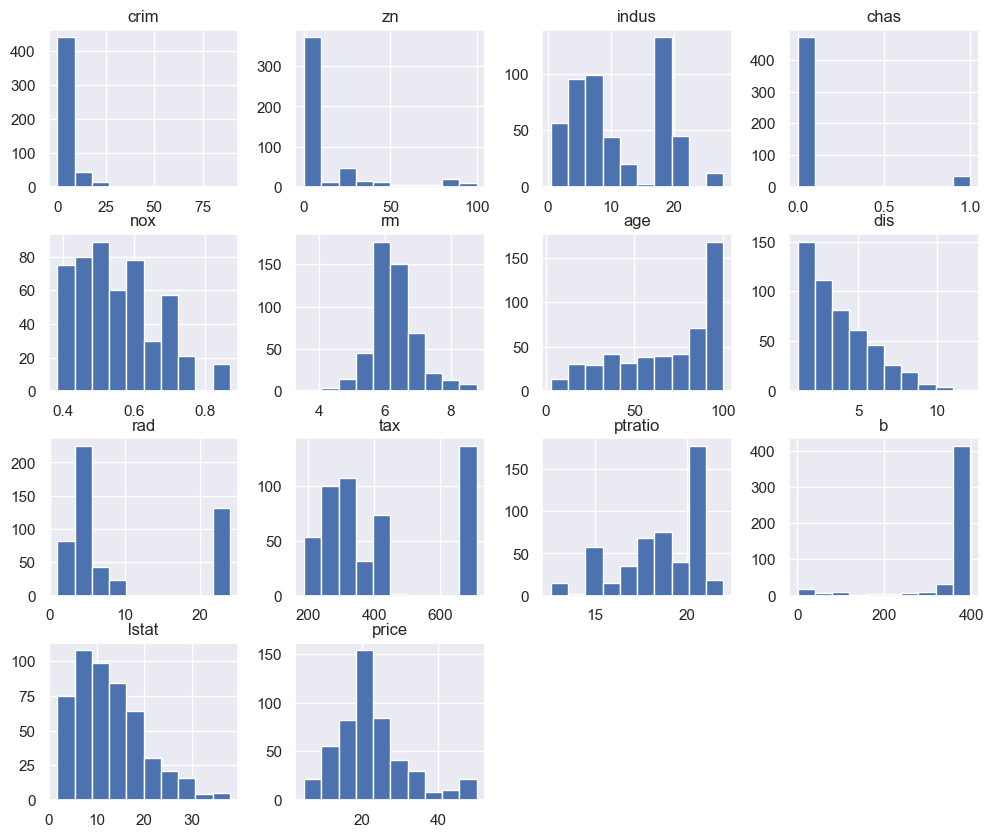

In [45]:
df.hist(figsize=(12,10));


Fine eda

In [46]:
y=df['price']
X=df.drop(columns='price')
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [47]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=667)


In [48]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)


LinearRegression()

In [49]:
# Beta regressor
model.coef_

array([-8.78070834e-02,  4.43465741e-02,  2.95271430e-03,  1.26617246e+00,
       -1.24943692e+01,  4.30123121e+00, -8.68537481e-03, -1.38083562e+00,
        2.90347909e-01, -1.58071807e-02, -9.11768904e-01,  8.57061442e-03,
       -4.95272478e-01])

In [50]:
# Intercept
model.intercept_

31.485337954608347

In [51]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

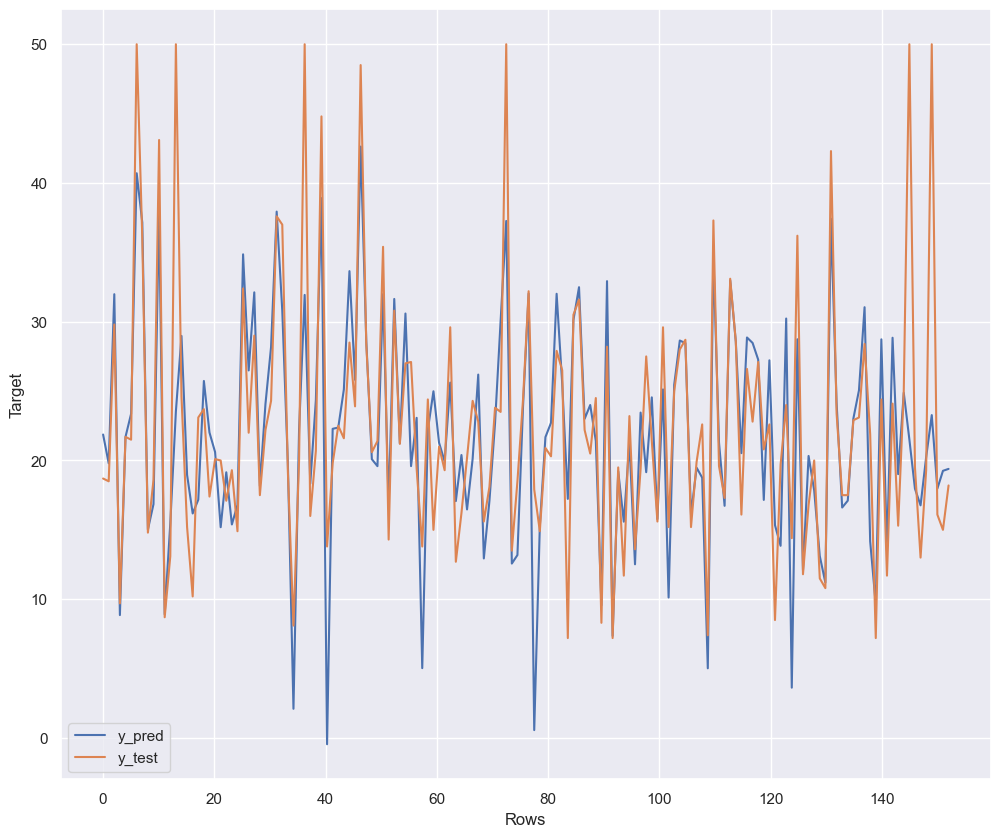

In [52]:
plt.figure(figsize = (12, 10))

l = y_pred.shape[0]
x = np.linspace(0,l,l)

plt.plot(x,y_pred)
plt.plot(x, y_test)
plt.title('')
plt.xlabel('Rows')
plt.ylabel('Target')
plt.legend(labels= ['y_pred', 'y_test'])

In [53]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,21.871252,18.7
1,19.794996,18.5
2,31.984598,29.8
3,8.856657,9.7
4,21.701449,21.7
...,...,...
147,20.240468,19.3
148,23.271086,50.0
149,17.970922,16.1
150,19.254917,15.0


In [54]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,21.871252,18.7,-3.171252
1,19.794996,18.5,-1.294996
2,31.984598,29.8,-2.184598
3,8.856657,9.7,0.843343
4,21.701449,21.7,-0.001449
...,...,...,...
147,20.240468,19.3,-0.940468
148,23.271086,50.0,26.728914
149,17.970922,16.1,-1.870922
150,19.254917,15.0,-4.254917


In [55]:
res_df['error'].mean()

0.6411367271633401

In [56]:

r2score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred, squared=False)

In [57]:
print('R2 score:',r2score)
print('MAE:' ,mae)
print('MSE:',mse)
print('RMSE:',rmse)

R2 score: 0.6113097827490298
MAE: 3.6837720318116567
MSE: 34.48551396483906
RMSE: 5.872436799561069


In [58]:
import joblib

## to save a model
joblib.dump(model,'reg_test.pkl')

['reg_test.pkl']

In [59]:
## to load model
newmodel = joblib.load('reg_test.pkl')
newmodel

LinearRegression()

In [60]:
X.to_csv("immobilidata.csv", index=False)